In [94]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# click_annotvcf annotations analysis

Created: **27/08/18**  
Last modified: **27/08/18**

**Goal:** This notebook studies the annotations added with click_annotvcf, see [/data/annotate_with_click_annotvcf](https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf).  
This notebook is divided in !! parts:
* **1. Bla**:

**Refs:**
* [data/annotate_with_click_annotvcf](
https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-click_annotvcf-annotations" data-toc-modified-id="Get-click_annotvcf-annotations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get click_annotvcf annotations</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Deal-with-NA-values" data-toc-modified-id="Deal-with-NA-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deal with <code>NA</code> values</a></span></li></ul></li><li><span><a href="#IMPACT-annotations-vs-VAGrENT-annotations-vs-VEP-annotations" data-toc-modified-id="IMPACT-annotations-vs-VAGrENT-annotations-vs-VEP-annotations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPACT annotations vs VAGrENT annotations vs VEP annotations</a></span><ul class="toc-item"><li><span><a href="#Variant_Type-vs-VAG_VT-vs-VEP_VARIANT_CLASS" data-toc-modified-id="Variant_Type-vs-VAG_VT-vs-VEP_VARIANT_CLASS-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>Variant_Type</code> vs <code>VAG_VT</code> vs <code>VEP_VARIANT_CLASS</code></a></span></li><li><span><a href="#Consequence-vs-VAG_EFFECT-vs-VEP_Consequence" data-toc-modified-id="Consequence-vs-VAG_EFFECT-vs-VEP_Consequence-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>Consequence</code> vs <code>VAG_EFFECT</code> vs <code>VEP_Consequence</code></a></span></li><li><span><a href="#Hugo_Symbol-vs-VAG_GENE-vs-VEP_SYMBOL" data-toc-modified-id="Hugo_Symbol-vs-VAG_GENE-vs-VEP_SYMBOL-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>Hugo_Symbol</code> vs <code>VAG_GENE</code> vs <code>VEP_SYMBOL</code></a></span></li><li><span><a href="#cDNA_change,-VAG_cDNA_CHANGE,-VEP_HGVSc" data-toc-modified-id="cDNA_change,-VAG_cDNA_CHANGE,-VEP_HGVSc-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>cDNA_change</code>, <code>VAG_cDNA_CHANGE</code>, <code>VEP_HGVSc</code></a></span></li><li><span><a href="#HGVSp_Short,-VAG_PROTEIN_CHANGE,-VEP_HGVSp" data-toc-modified-id="HGVSp_Short,-VAG_PROTEIN_CHANGE,-VEP_HGVSp-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><code>HGVSp_Short</code>, <code>VAG_PROTEIN_CHANGE</code>, <code>VEP_HGVSp</code></a></span></li></ul></li><li><span><a href="#Other-VAGrENT-annotations" data-toc-modified-id="Other-VAGrENT-annotations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Other VAGrENT annotations</a></span></li><li><span><a href="#Other-VEP-annotations" data-toc-modified-id="Other-VEP-annotations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other VEP annotations</a></span><ul class="toc-item"><li><span><a href="#VEP_BIOTYPE" data-toc-modified-id="VEP_BIOTYPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>VEP_BIOTYPE</code></a></span></li></ul></li><li><span><a href="#VEP-gnomAD-annotations" data-toc-modified-id="VEP-gnomAD-annotations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>VEP gnomAD annotations</a></span><ul class="toc-item"><li><span><a href="#VEP_gnomAD_AF-vs-Kaviar_AF" data-toc-modified-id="VEP_gnomAD_AF-vs-Kaviar_AF-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><code>VEP_gnomAD_AF</code> vs <code>Kaviar_AF</code></a></span></li><li><span><a href="#VEP_MAX_AF-and-VEP_MAX_AF_POPS" data-toc-modified-id="VEP_MAX_AF-and-VEP_MAX_AF_POPS-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><code>VEP_MAX_AF</code> and <code>VEP_MAX_AF_POPS</code></a></span></li></ul></li><li><span><a href="#VEP-COSMIC-annotations" data-toc-modified-id="VEP-COSMIC-annotations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>VEP COSMIC annotations</a></span><ul class="toc-item"><li><span><a href="#VEP_COSMIC_CNT-vs-cosmic_count" data-toc-modified-id="VEP_COSMIC_CNT-vs-cosmic_count-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><code>VEP_COSMIC_CNT</code> vs <code>cosmic_count</code></a></span></li></ul></li></ul></div>

In [95]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [96]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, annotations = TRUE)

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [97]:
impact_annotated <- read.table("../../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                   sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [98]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 157

[1] 588547

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
3 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
4 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
5 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
6 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 TGGAA     C      GGTGC     NA   NA        NA        0                
3 GCTCG     A      GTTCT     NA   NA        NA        0                
4 CGAGG     A      GGATT     NA   NA        NA        0                
5 TTTCT     G      TTTCT     NA   NA        NA        0                
6 TTTCT     T      TTTCT     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

In [99]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_RNA_CHANGE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_BIOTYPE", "VEP_SYMBOL", "VEP_EXON", "VEP_INTRON", "VEP_HGVSc",
                  "VEP_HGVSp", "VEP_Amino_acids", "VEP_Codons", "VEP_VARIANT_CLASS", "VEP_SIFT", "VEP_PolyPhen")
    
vep_gnomad_colnames <- c("VEP_gnomAD_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS")
vep_cosmic_colnames <- c("VEP_COSMIC", "VEP_COSMIC_CDS", "VEP_COSMIC_AA", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_gnomad_colnames, vep_cosmic_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`START`\_`REF`_`ALT` for `impact_annotated`, however because the file was annotated from `impact` converted to `.vcf` format, there's a correction to be made for `INS` and `DEL` (ex: for insertions the syntax is `-/A` for `impact` vs `T/TA` for `impact_annotated`).

In [100]:
get_join_key <- function(data) {
    
    if (substr(data["REF"], 1, 1) == substr(data["ALT"], 1, 1) &
        (nchar(data["REF"]) == 1 | nchar(data["ALT"]) == 1)) {
        
        data["REF"] = substr(data["REF"], 2, nchar(data["REF"]))
        data["ALT"] = substr(data["ALT"], 2, nchar(data["ALT"]))
        
        if (nchar(data["REF"]) == 0)
            data["REF"] = '-'
        else
            data["ALT"] = '-'
    }

    return (gsub(' ', '', (paste(data["CHR"], data["START"], data["REF"], data["ALT"], sep = "_"))))
}


# head(apply(impact_annotated[1:9000,], 1, get_join_key))
impact_annotated$join_key <- apply(impact_annotated, 1, get_join_key)
head(impact_annotated$join_key)

[1] "1_2487766_T_C" "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A"
[5] "1_2487998_C_G" "1_2487998_C_T"

**Verification 1** Msake sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

Somehow some deletions and insertion don't have the same format.

In [101]:
unmatched <- impact[! impact$mut_key %in% impact_annotated$join_key,] 
table(unmatched$Variant_Type)
head(unmatched[order(unmatched$Hugo_Symbol),])
table(unmatched$mut_key %in% impact_annotated$ID_VARIANT)

is_unmatched <- which(impact_annotated$ID_VARIANT %in% unmatched$mut_key)

impact_annotated$join_key[is_unmatched] <- impact_annotated$ID_VARIANT[is_unmatched]


DEL INS 
 78   9 

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count
213563,APC,5,112175611,112175612,frameshift_deletion,DEL,AC,A,P-0025157-T01-IM6,c.4319_4321delinsAA,p.P1440Qfs*33,367,0.26431,97,364,0.00275,1,175,186,44,53,UNLIKELY,704,5_112175611_AC_A,P-0025157-T01-IM6_5_112175611_AC_A,0,0,0
51669,ARID1A,1,27107224,27107225,frameshift_insertion,INS,T,TA,P-0006734-T01-IM5,c.6835_6836delinsGTA,p.L2279fs,695,0.40288,280,345,0.00000,0,215,199,132,148,MANUAL_OK,873,1_27107224_T_TA,P-0006734-T01-IM5_1_27107224_T_TA,0,0,0
68891,ARID1A,1,27106470,27106480,frameshift_deletion,DEL,ACCACTAACTT,A,P-0009005-T01-IM5,c.6080_8091delinsAA,p.A2027fs,670,0.37910,254,383,0.00261,1,231,185,141,113,AUTO_OK,1098,1_27106470_ACCACTAACTT_A,P-0009005-T01-IM5_1_27106470_ACCACTAACTT_A,0,0,0
112201,ARID1A,1,27101522,27101523,frameshift_deletion,DEL,AG,A,P-0014308-T01-IM6,c.4803_4805delinsAA,p.S1602Tfs*10,968,0.35537,344,952,0.00105,1,493,474,167,177,AUTO_OK,989,1_27101522_AG_A,P-0014308-T01-IM6_1_27101522_AG_A,0,0,0
230700,ARID1A,1,27106597,27106607,frameshift_deletion,DEL,CAGTTGGACCT,C,P-0027143-T01-IM6,c.6207_6218delinsAC,p.Q2070Hfs*62,867,0.22261,193,599,0.00501,3,315,361,94,99,AUTO_OK,790,1_27106597_CAGTTGGACCT_C,P-0027143-T01-IM6_1_27106597_CAGTTGGACCT_C,0,0,0
178730,ARID1B,6,157505405,157505406,frameshift_deletion,DEL,TA,T,P-0021290-T01-IM6,c.3385_3387delinsTT,p.N1130Tfs*12,554,0.32310,179,557,0.00180,1,276,278,91,88,AUTO_OK,627,6_157505405_TA_T,P-0021290-T01-IM6_6_157505405_TA_T,0,0,0



TRUE 
  87 

**Verification 2** The features are unique for each `join_key`:

In [102]:
impact_annotated <- unique(impact_annotated)

In [103]:
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [104]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_gnomad_colnames, vep_cosmic_colnames)

In [105]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames,
                                                                            vep_colnames,
                                                                            vep_gnomad_colnames,
                                                                            vep_cosmic_colnames)]

### Deal with `NA` values

In [124]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

#### VAGrENT

In [127]:
vag_colnames

[1] "VAG_VT"             "VAG_GENE"           "VAG_RNA_CHANGE"    
[4] "VAG_cDNA_CHANGE"    "VAG_PROTEIN_CHANGE" "VAG_EFFECT"

In [128]:
count_na(impact$VAG_VT)

[1] 0

In [136]:
count_na(impact$VAG_GENE)
count_na(impact$VAG_EFFECT)
count_na(impact$VAG_RNA_CHANGE)

nrow(impact[is.na(impact$VAG_GENE) & is.na(impact$VAG_EFFECT) & is.na(impact$VAG_RNA_CHANGE),])

[1] 7415

[1] 7415

[1] 7415

[1] 7415

In [137]:
count_na(impact$VAG_cDNA_CHANGE)
count_na(impact$VAG_PROTEIN_CHANGE)

nrow(impact[is.na(impact$VAG_cDNA_CHANGE) & is.na(impact$VAG_PROTEIN_CHANGE),])

[1] 12118

[1] 12118

[1] 12118

#### VEP

In [131]:
vep_colnames

[1] "VEP_Consequence"   "VEP_BIOTYPE"       "VEP_SYMBOL"       
 [4] "VEP_EXON"          "VEP_INTRON"        "VEP_HGVSc"        
 [7] "VEP_HGVSp"         "VEP_Amino_acids"   "VEP_Codons"       
[10] "VEP_VARIANT_CLASS" "VEP_SIFT"          "VEP_PolyPhen"

#### VEP gnomAD

In [119]:
vep_gnomad_colnames

[1] "VEP_gnomAD_AF"   "VEP_MAX_AF"      "VEP_MAX_AF_POPS"

In [132]:
count_na(impact$VEP_gnomAD_AF)
count_na(impact$VEP_MAX_AF)
count_na(impact$VEP_MAX_AF_POPS)

[1] 194862

[1] 199269

[1] 194346

#### VEP COSMIC

In [133]:
vep_cosmic_colnames

[1] "VEP_COSMIC"     "VEP_COSMIC_CDS" "VEP_COSMIC_AA"  "VEP_COSMIC_CNT"

In [134]:
count_na(impact$VEP_COSMIC)
count_na(impact$VEP_COSMIC_CDS)
count_na(impact$VEP_COSMIC_AA)
count_na(impact$VEP_COSMIC_CNT)

[1] 182777

[1] 182822

[1] 182822

[1] 182822

## IMPACT annotations vs VAGrENT annotations vs VEP annotations

In [84]:
vag_colnames
vep_colnames

[1] "VAG_VT"             "VAG_GENE"           "VAG_RNA_CHANGE"    
[4] "VAG_cDNA_CHANGE"    "VAG_PROTEIN_CHANGE" "VAG_EFFECT"

[1] "VEP_Consequence"   "VEP_BIOTYPE"       "VEP_SYMBOL"       
 [4] "VEP_EXON"          "VEP_INTRON"        "VEP_HGVSc"        
 [7] "VEP_HGVSp"         "VEP_Amino_acids"   "VEP_Codons"       
[10] "VEP_VARIANT_CLASS" "VEP_SIFT"          "VEP_PolyPhen"

### `Variant_Type` vs `VAG_VT` vs `VEP_VARIANT_CLASS`

     
      Complex    Del    Ins    Sub
  DEL     615  22812      0      0
  DNP    2872      0      0      0
  INS     132      0   7707      0
  SNP      86      0      0 213880
  TNP     189      0      0      0

     
      deletion  indel insertion    SNV substitution
  DEL    22393   1013         0      0           21
  DNP        0      0         0      0         2872
  INS        0    153      7662      0           24
  SNP        0      0         0 213880           86
  TNP        0      0         0      0          189

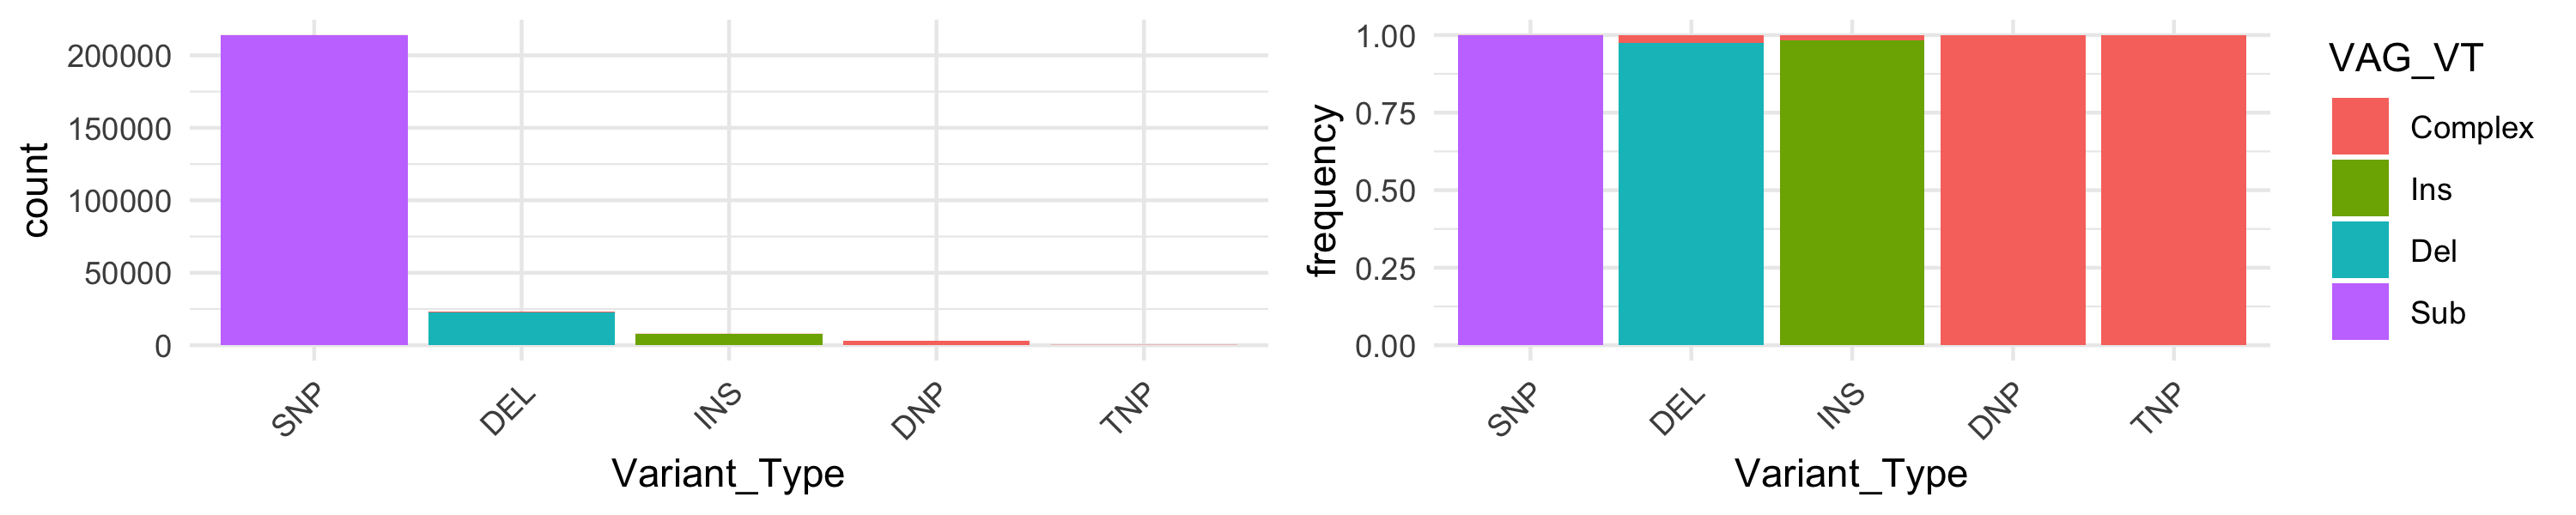

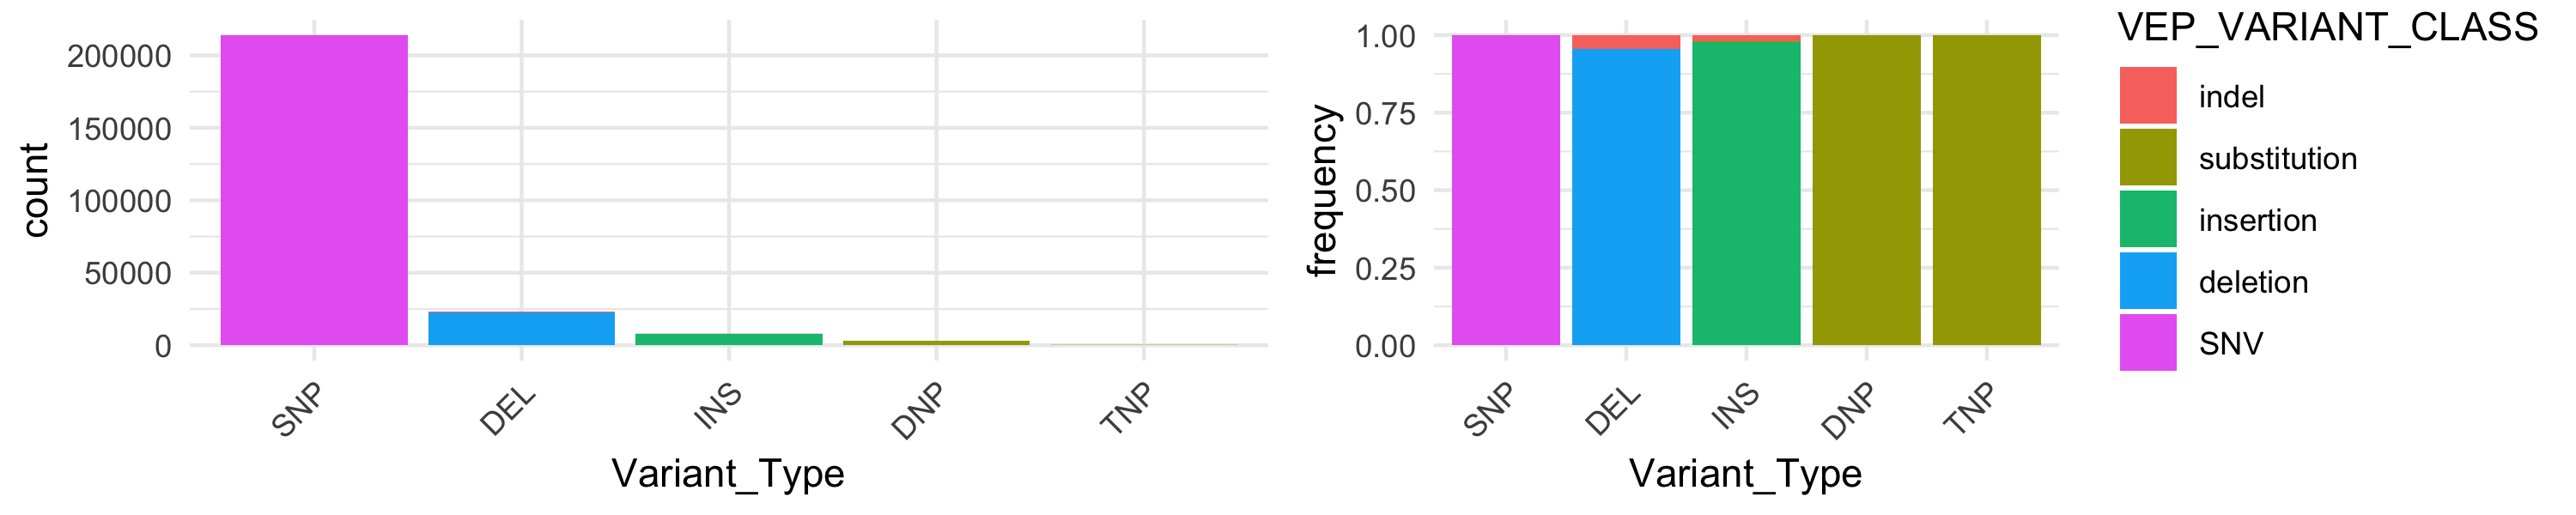

In [86]:
table(impact$Variant_Type, impact$VAG_VT)
table(impact$Variant_Type, impact$VEP_VARIANT_CLASS)


plot_contingency_table_as_histograms(impact, "Variant_Type", "VAG_VT", height = 2)
plot_contingency_table_as_histograms(impact, "Variant_Type", "VEP_VARIANT_CLASS", height = 2)

### `Consequence` vs `VAG_EFFECT` vs `VEP_Consequence`

In [88]:
get_table(impact$Consequence)
get_table(impact$VAG_EFFECT) %>% filter(count >= 500)
get_table(impact$VEP_Consequence) %>% filter(count >= 500)

values,count,freq
nonsynonymous_SNV,142688,57.5%
synonymous_SNV,50005,20.1%
stopgain_SNV,18769,7.6%
frameshift_deletion,16737,6.7%
splicing,8457,3.4%
frameshift_insertion,6423,2.6%
nonframeshift_deletion,4293,1.7%
nonframeshift_insertion,921,0.4%
-- total --,248293,100%


values,count,freq
non_synonymous_codon,142069,57.2%
synonymous_codon,50400,20.3%
stop_gained,17875,7.2%
frameshift_variant,17403,7%
unknown,7415,3%
splice_site_variant,5646,2.3%
intron_variant,1587,0.6%
5KB_downstream_variant,1476,0.6%
extended_intronic_splice_region_variant,979,0.4%
inframe_codon_gain,872,0.4%


values,count,freq
missense_variant,138178,55.7%
synonymous_variant,47768,19.2%
frameshift_variant,22627,9.1%
stop_gained,17386,7%
missense_variant&splice_region_variant,4320,1.7%
inframe_deletion,3575,1.4%
splice_acceptor_variant,3097,1.2%
splice_donor_variant,2506,1%
splice_region_variant&synonymous_variant,1241,0.5%
splice_region_variant&intron_variant,1127,0.5%


### `Hugo_Symbol` vs `VAG_GENE` vs `VEP_SYMBOL`

In [70]:
compare_features <- function(data, feature_1_name, feature_2_name, feature_3_name) {
    dd <- data[data[,feature_1_name] != data[,feature_2_name] |
               data[,feature_1_name] != data[,feature_3_name] |
               data[,feature_2_name] != data[,feature_3_name], c(feature_1_name, feature_2_name, feature_3_name)]
    print(print_count_and_proportion(nrow(dd), nrow(data)))
    print(print_count_and_proportion(nrow(unique(dd)),
                                     nrow(unique(data[,c(feature_1_name, feature_2_name, feature_3_name)]))))

    rownames(dd) <- NULL
    return(unique(dd))
}

In [ ]:
head(compare_features(impact, "Hugo_Symbol", "VAG_GENE", "VEP_SYMBOL"))

### `cDNA_change`, `VAG_cDNA_CHANGE`, `VEP_HGVSc`

In [ ]:
head(impact$VEP_HGVSc)

In [ ]:
strsplit('ENST00000269305.4:c.766A>C', ':')[[1]][2]
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

In [ ]:
head(compare_features(impact, "cDNA_change", "VAG_cDNA_CHANGE", "VEP_HGVSc"))

### `HGVSp_Short`, `VAG_PROTEIN_CHANGE`, `VEP_HGVSp`

In [29]:
head(impact$VEP_HGVSp)

[1] "ENSP00000269305.4:p.Thr256Pro"  "ENSP00000320485.7:p.Pro1618%3D"
[3] "ENSP00000349932.4:p.Leu484%3D"  "ENSP00000262741.5:p.Ile298Met" 
[5] "ENSP00000343741.4:p.Arg2431Met" "ENSP00000257290.5:p.Leu465Met"

In [30]:
strsplit('ENSP00000269305.4:p.Thr256Pro', ':')[[1]][2]
#impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

[1] "p.Thr256Pro"

In [ ]:
head(compare_features(impact, "HGVSp_Short", "VAG_PROTEIN_CHANGE", "VEP_HGVSp"))

## Other VAGrENT annotations

In [92]:
nrow(impact[is.na(impact$VAG_RNA_CHANGE),])

[1] 7415

## Other VEP annotations

In [21]:
vep_colnames

### `VEP_BIOTYPE`

In [23]:
get_table(impact$VEP_BIOTYPE)

values,count,freq
protein_coding,247680,99.8%
nonsense_mediated_decay,493,0.2%
antisense,25,0%
processed_transcript,16,0%
retained_intron,15,0%
lincRNA,10,0%
unprocessed_pseudogene,1,0%
transcribed_unprocessed_pseudogene,1,0%
pseudogene,1,0%
processed_pseudogene,1,0%


In [24]:
vep_colnames <- c("VEP_Consequence", "VEP_BIOTYPE", "VEP_SYMBOL", "VEP_EXON", "VEP_INTRON", "VEP_HGVSc",
                  "VEP_HGVSp", "VEP_Amino_acids", "VEP_Codons", "VEP_VARIANT_CLASS", "VEP_SIFT", "VEP_PolyPhen")

## VEP gnomAD annotations

In [32]:
vep_gnomad_colnames

### `VEP_gnomAD_AF` vs `Kaviar_AF`

In [33]:
summary(impact$VEP_gnomAD_AF)
impact$VEP_gnomAD_AF[is.na(impact$VEP_gnomAD_AF)] <- 0.0
summary(impact$VEP_gnomAD_AF)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00    0.00    0.00    0.66  194862 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0003502 0.0000000 0.6610000 

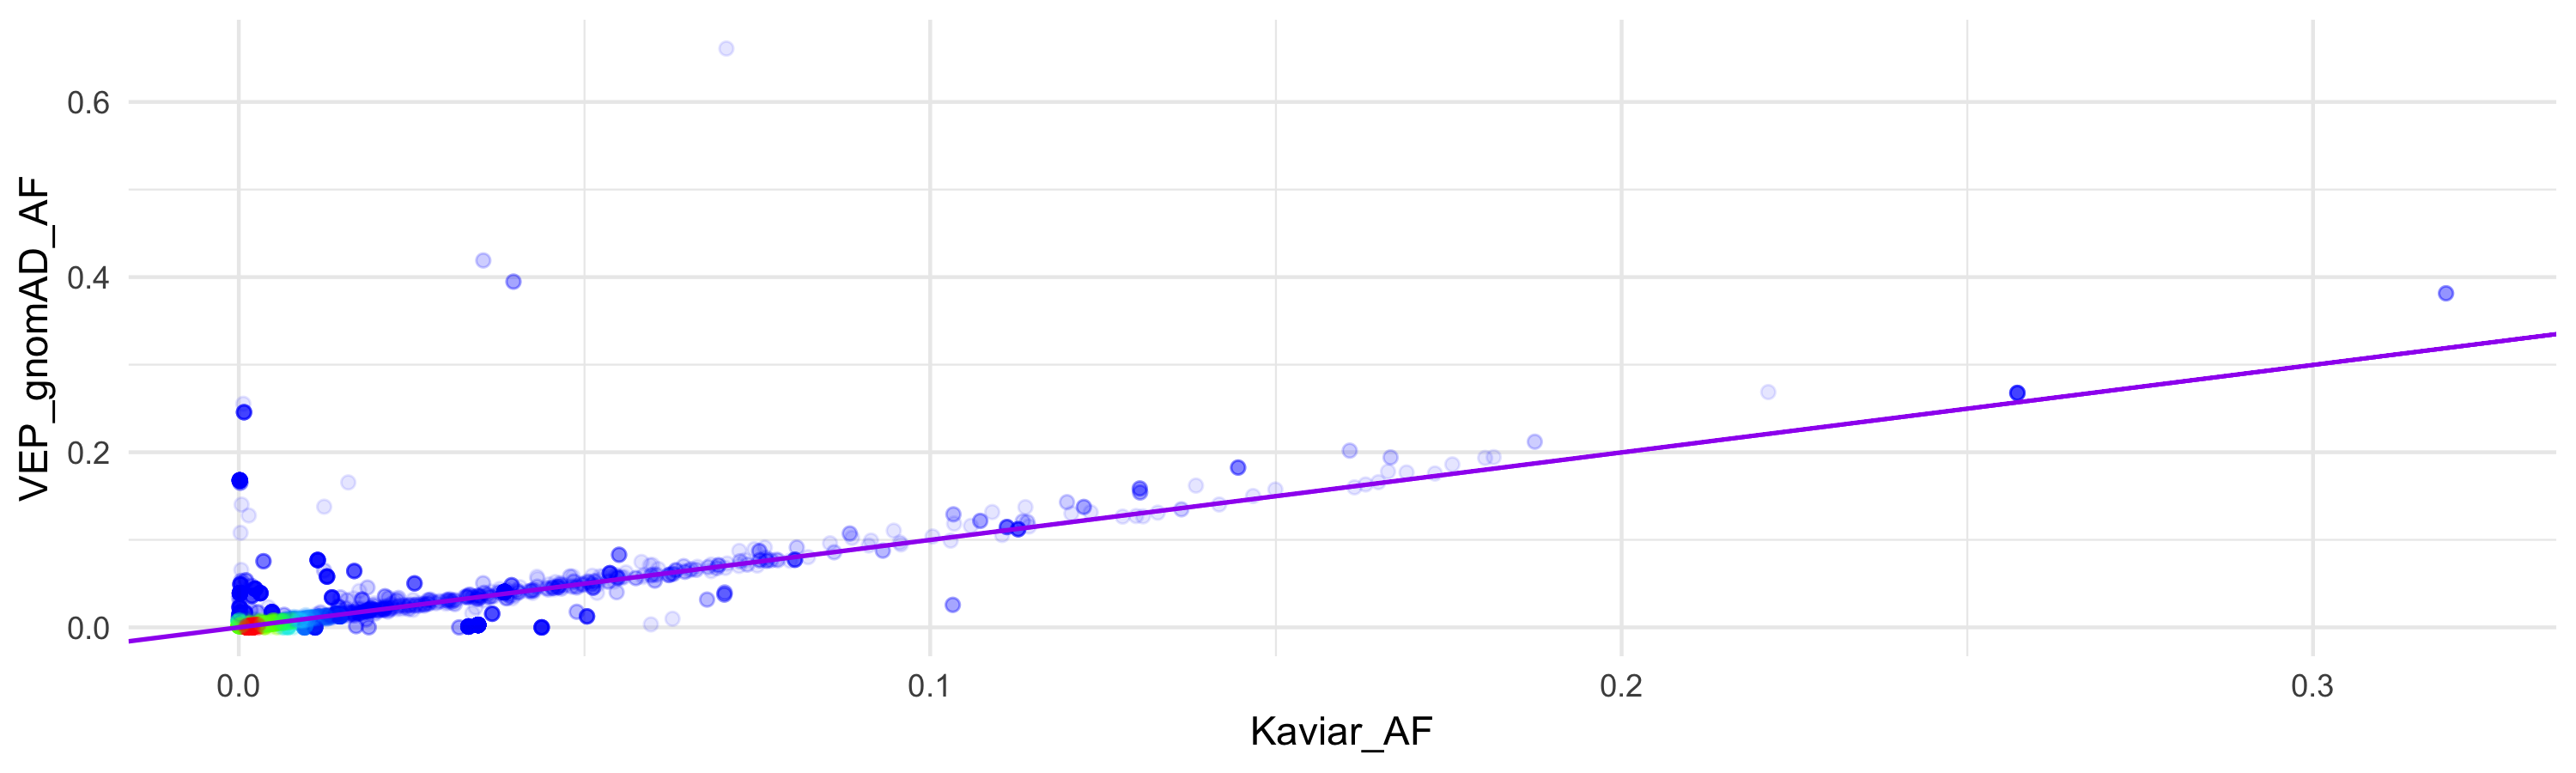

In [34]:
plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_gnomAD_AF > 0.001,],
                "Kaviar_AF", "VEP_gnomAD_AF", points_only = TRUE) + 
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

In [35]:
nrow(impact[abs(impact$Kaviar_AF - impact$VEP_gnomAD_AF) >= 0.1,])
get_table(impact$Hugo_Symbol[abs(impact$Kaviar_AF - impact$VEP_gnomAD_AF) >= 0.1])

[1] 71

values,count,freq
LATS2,40,56.3%
NCOR1,12,16.9%
HLA-B,12,16.9%
HLA-A,4,5.6%
KMT2C,2,2.8%
TET1,1,1.4%
-- total --,71,100%


### `VEP_MAX_AF` and `VEP_MAX_AF_POPS`

In [36]:
impact$VEP_MAX_AF[is.na(impact$VEP_MAX_AF)] <- 0.0
impact$VEP_MAX_AF_POPS[is.na(impact$VEP_MAX_AF_POPS)] <- ""

## VEP COSMIC annotations

In [37]:
vep_cosmic_colnames

### `VEP_COSMIC_CNT` vs `cosmic_count`

In [38]:
impact$VEP_COSMIC_CNT[is.na(impact$VEP_COSMIC_CNT)] <- 0

In [39]:
head(unique(impact$VEP_COSMIC_CNT), 100)

[1] "1"                            "0"                           
  [3] "1&1&1&1&1&1"                  "1&1&1"                       
  [5] "1&1"                          "53"                          
  [7] "158"                          "19&21&14"                    
  [9] "229&230&200&230&179&789"      "42&170"                      
 [11] "2"                            "44"                          
 [13] "90&90&413&65&77"              "2&2"                         
 [15] "3"                            "32&27&56&25"                 
 [17] "239&261&766&221"              "14&46"                       
 [19] "4&4"                          "60&3"                        
 [21] "1676&463"                     "169&106"                     
 [23] "41&109&41&37&41&35&41"        "504&2256"                    
 [25] "57&28"                        "184&658&134&184&184&148"     
 [27] "5&10&5&5"                     "1153&342&341&342&292&259&339"
 [29] "910&9454"                     "7"                           
 [31] "23"                           "140&173&173&173&173&382&131" 
 [33] "58&58&163&58&49&58&47"        "28&31&24&78"                 
 [35] "13958&1001"                   "10"                          
 [37] "43&43&95&43&37"               "1&3&1&2"                     
 [39] "1&1&2"                        "17&12&13&13&12"              
 [41] "6"                            "8&10&10"                     
 [43] "2&1"                          "41"                          
 [45] "6&6&3&6&11"                   "4&1"                         
 [47] "52&52&95&52&42"               "762"                         
 [49] "9&11&26&9&11"                 "1&1&1&3&1"                   
 [51] "520"                          "4&2"                         
 [53] "159&55"                       "12&4"                        
 [55] "531"                          "80&44"                       
 [57] "21&21&18&19&50&21"            "39&39&33&39&108&30"          
 [59] "93"                           "23&23&14&23&74&14&23"        
 [61] "339"                          "3&4"                         
 [63] "6&11"                         "58&502"                      
 [65] "1872&53"                      "18&30"                       
 [67] "234&1018"                     "3&3"                         
 [69] "31"                           "32"                          
 [71] "26&36&91&30&36&36&36"         "134&4669"                    
 [73] "54&17&18&18"                  "94&321"                      
 [75] "4&9"                          "1&2"                         
 [77] "1109"                         "193"                         
 [79] "5&5&4&14"                     "85"                          
 [81] "60&169&60&42&46&60&60"        "17&28"                       
 [83] "6&12"                         "46"                          
 [85] "2&2&2&2&2"                    "1436"                        
 [87] "8&8&6&6&8&45&8"               "18&23&23&18&23&23&89"        
 [89] "14&43"                        "5&5"                         
 [91] "14&6"                         "15&15&50&5&15&15"            
 [93] "17"                           "66"                          
 [95] "12&10&36&10&12"               "12&4&1&1&4&4"                
 [97] "14&14&33&18&18&18&18"         "20&100"                      
 [99] "2316"                         "44&247"

In [40]:
get_cosmic_count_from_vep <- function(cosmic_string) {
    return (sum(as.integer(strsplit(cosmic_string, "&")[[1]]))) 
}

get_cosmic_count_from_vep("1&1&1&1&1&1")
get_cosmic_count_from_vep("15&15&50&5&15&15")

[1] 6

[1] 115

In [41]:
impact$VEP_COSMIC_CNT <- sapply(impact$VEP_COSMIC_CNT, get_cosmic_count_from_vep)

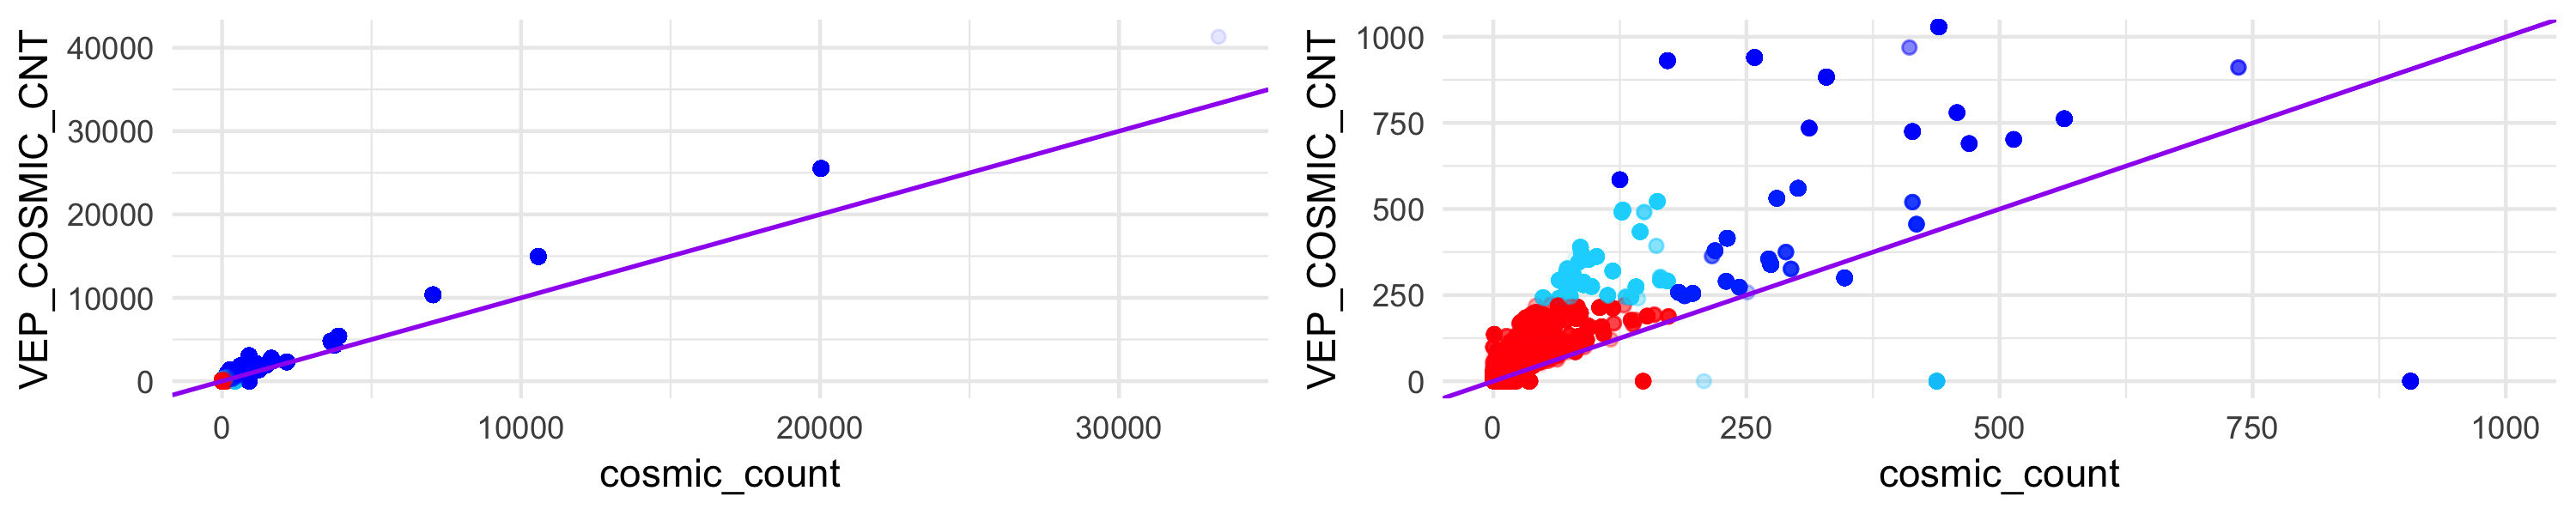

In [42]:
plot1 <- plot_density_2d(impact[impact$cosmic_count > 0 | impact$VEP_COSMIC_CNT > 0,],
                "cosmic_count", "VEP_COSMIC_CNT", points_only = TRUE) + 
    geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot1 + coord_cartesian(xlim = c(0:1000), ylim = c(0:1000))

plot_side_by_side(plot1, plot2)

[1] 1635

[1] "Number of different genes:  166"


[1] 1503

[1] "Number of different genes:  29"


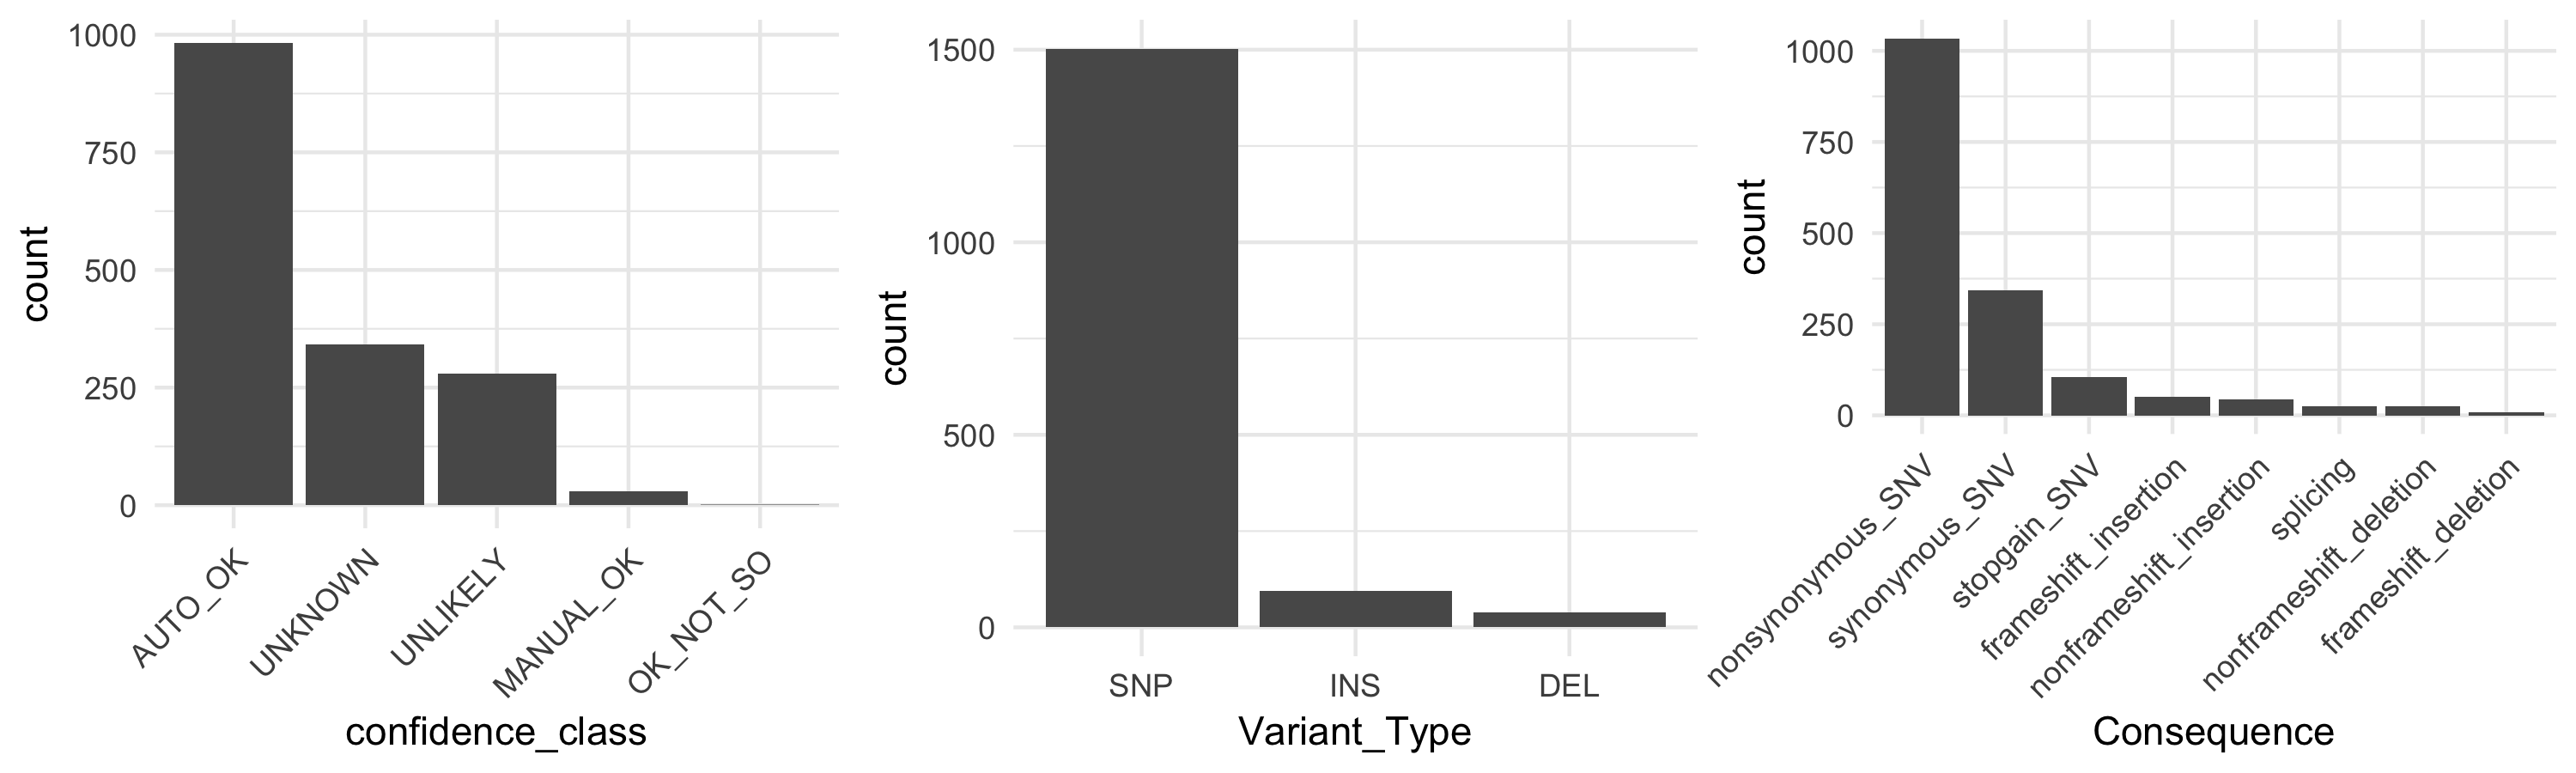

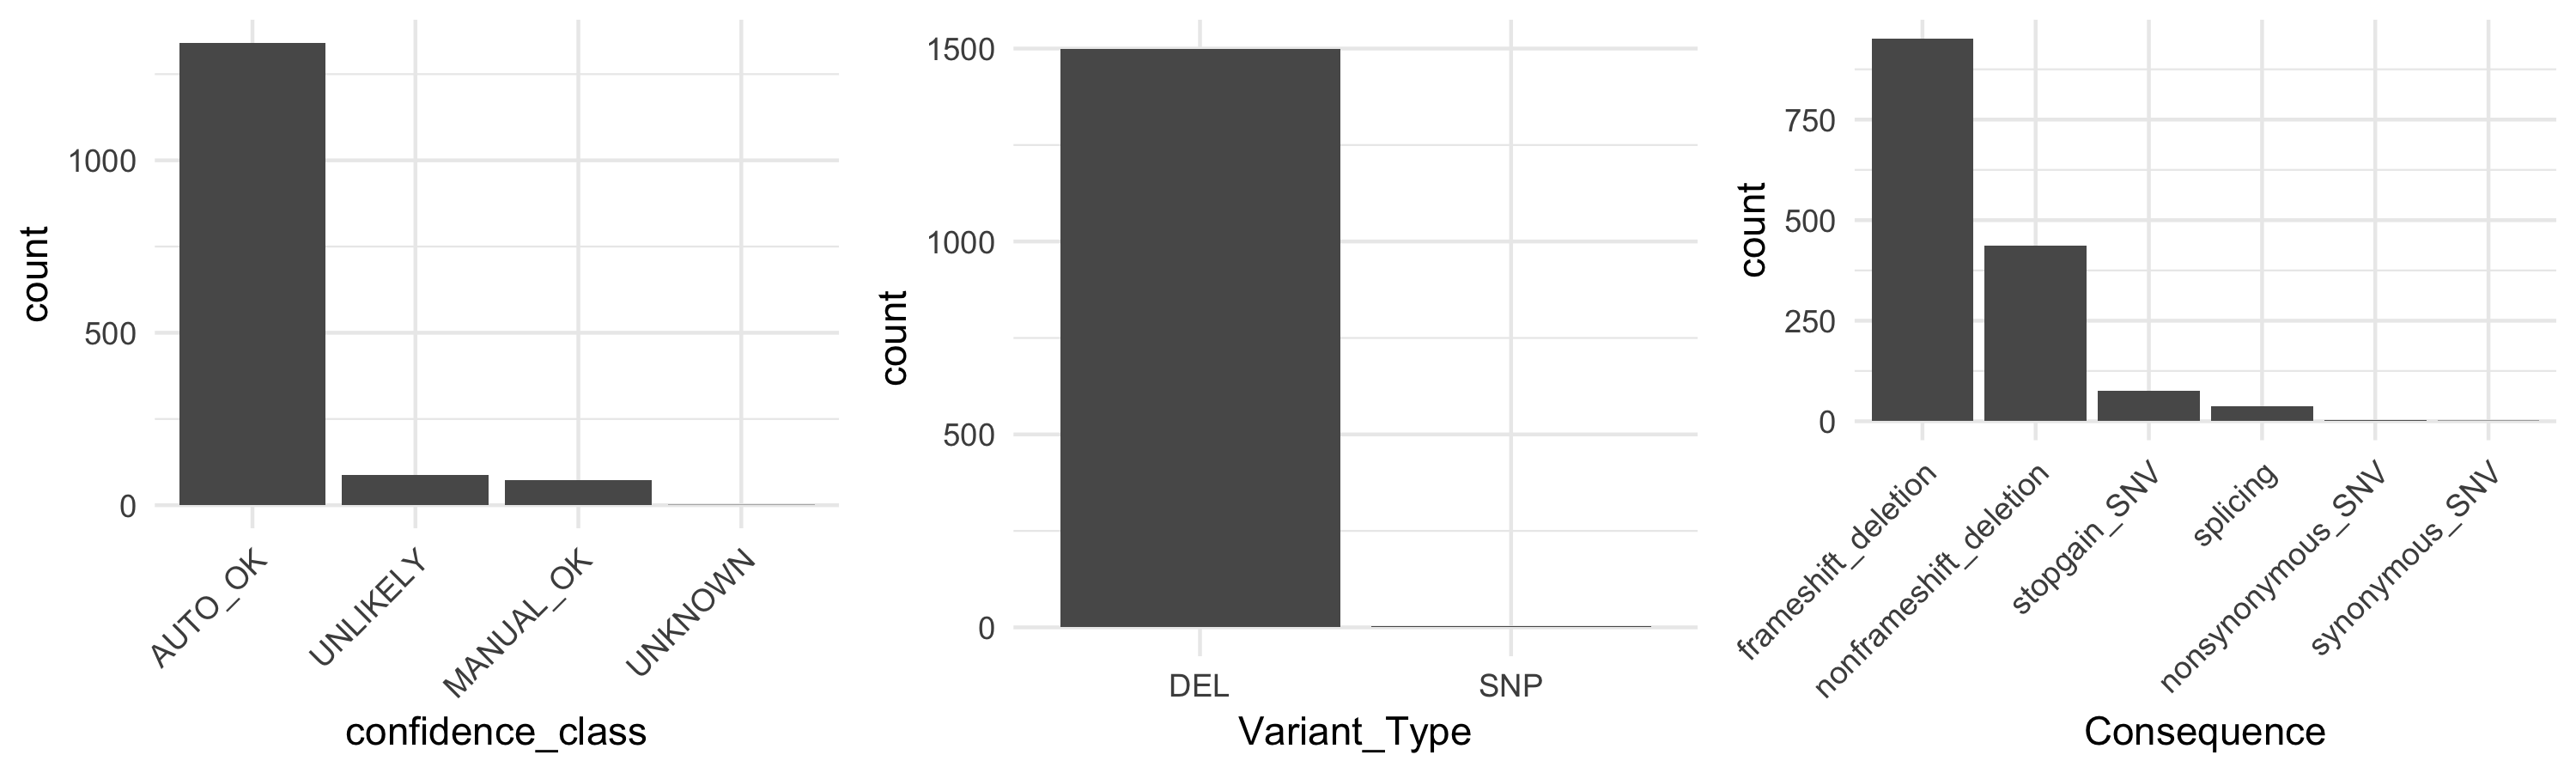

In [43]:
nrow(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])
get_possible_correlations(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])

nrow(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])
get_possible_correlations(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])